In [1]:
import numpy as np
import pandas as pd
import pybiomart as bm
import scanpy as sc

In [12]:
import pybiomart as bm

In [27]:
input_Wang = '/Users/anna.maguza/Desktop/Data/Gut_project/Wang/Wang_anndata_raw/Wang_2022_raw_anndata.h5ad'
Wang = sc.read_h5ad(input_Wang)

In [3]:
# Upload unprocessed dataset (before HVGs extraction)
input_path_healthy_all_counts = '/Users/anna.maguza/Desktop/Data/Processed_datasets/Healthy_reference/GCA_Kong_Smillie_Wang_unprocessed/GCA_Kong_Wang_Smillie_raw.h5ad'
healthy_all_counts = sc.read_h5ad(input_path_healthy_all_counts)

### Find sex in Wang dataset

In [14]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("ensembl_gene_id")

In [20]:
# change index in annot to external_gene_name
annot.index = annot['external_gene_name']

In [21]:
annot.head()

,external_gene_name,start_position,end_position,chromosome_name
external_gene_name,,,,
MT-TF,MT-TF,577,647,MT
MT-RNR1,MT-RNR1,648,1601,MT
MT-TV,MT-TV,1602,1670,MT
MT-RNR2,MT-RNR2,1671,3229,MT
MT-TL1,MT-TL1,3230,3304,MT


In [28]:
Wang.var

,GENE
GENE,
RP11-34P13.7,RP11-34P13.7
FO538757.2,FO538757.2
AP006222.2,AP006222.2
RP4-669L17.10,RP4-669L17.10
RP11-206L10.9,RP11-206L10.9
...,...
GGT2,GGT2
RP3-510H16.3,RP3-510H16.3
RP4-669P10.16,RP4-669P10.16


In [29]:
chrY_genes = Wang.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'TTTY7', 'TBL1Y', 'USP9Y',
       'DDX3Y', 'UTY', 'TMSB4Y', 'TTTY14', 'KDM5D', 'EIF1AY', 'RPS4Y2',
       'PRORY', 'NLGN4Y'],
      dtype='object')

In [30]:
Wang.var_names.str.match('XIST')

array([False, False, False, ..., False, False, False])

In [31]:
chrY_sum = Wang[:, chrY_genes].X.sum(axis=1)
total_sum = Wang.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
Wang.obs['percent_chrY'] = (np.asarray(chrY_sum).flatten() / np.asarray(total_sum).flatten()) * 100

In [33]:
Wang.obs["XIST-counts"] = Wang.X[:, Wang.var_names.str.match('XIST')].squeeze()

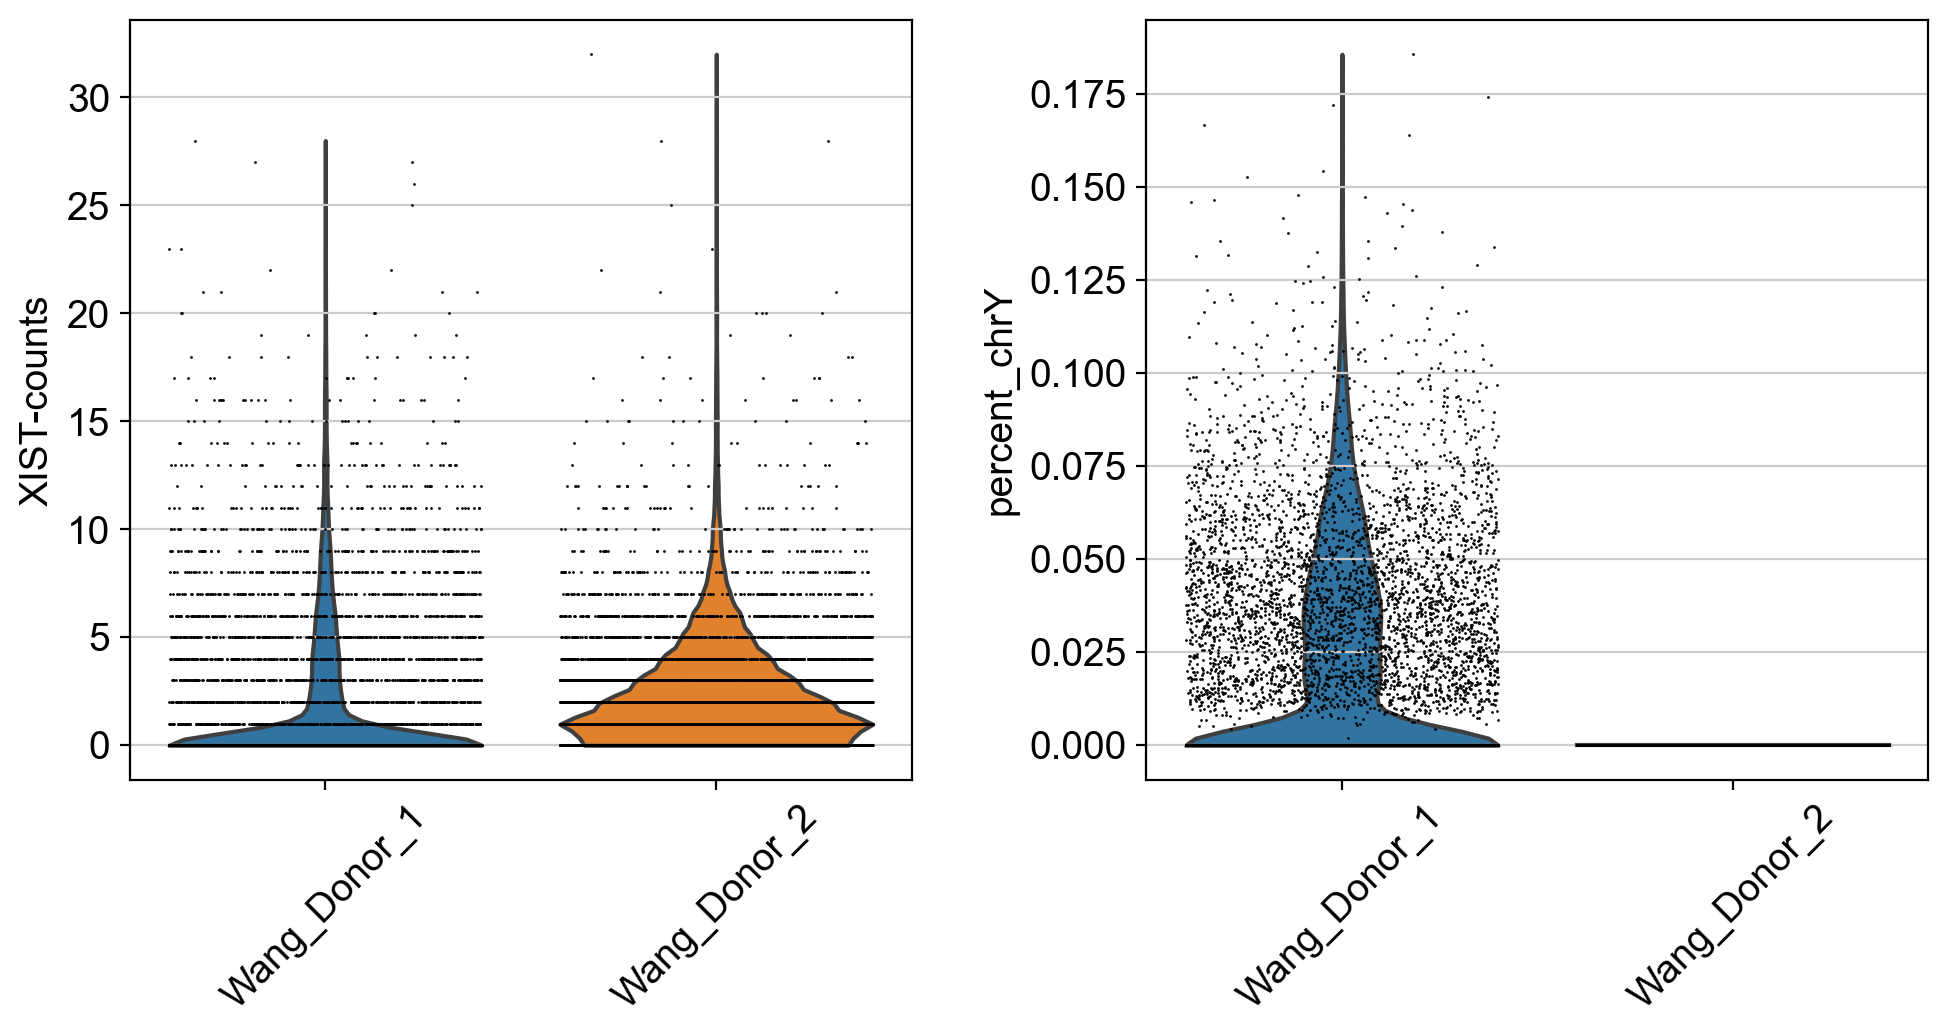

In [36]:
sc.set_figure_params(figsize=(5, 5),dpi=100)
sc.pl.violin(Wang, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'Donor_ID', rotation = 45)

In [37]:
# Add 'Female' to sex column in adata.obs
female_donors = ['Wang_Donor_2']

Wang.obs['Sex'] = ['Female' if donor in female_donors else 'Male' for donor in Wang.obs['Donor_ID']]

In [38]:
Wang.obs['Sex'].value_counts()

Male      7406
Female    7131
Name: Sex, dtype: int64

### Find sex in Smillie dataset

In [40]:
input_Smillie = '/Users/anna.maguza/Desktop/Data/Gut_project/Smillie/Anndata_raw/Smillie_ulcerative_colitis_anndata.h5ad'
Smillie = sc.read_h5ad(input_Smillie)

In [41]:
Smillie.var

""
gene_id
7SK
A1BG
A1BG-AS1
A1CF
A2M
...
hsa-mir-5571
hsa-mir-6080
hsa-mir-8072


In [42]:
chrY_genes = Smillie.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['DDX3Y', 'EIF1AY', 'KDM5D', 'LINC00278', 'NLGN4Y', 'PCDH11Y', 'RPS4Y1',
       'RPS4Y2', 'SNORA70', 'SRY', 'TMSB4Y', 'TTTY14', 'USP9Y', 'UTY', 'Y_RNA',
       'ZFY', 'ZFY-AS1'],
      dtype='object')

In [43]:
Smillie.var_names.str.match('XIST')

array([False, False, False, ..., False, False, False])

In [44]:
chrY_sum = Smillie[:, chrY_genes].X.sum(axis=1)
total_sum = Smillie.X.sum(axis=1)

# Flatten the arrays and calculate percent_chrY
Smillie.obs['percent_chrY'] = (np.asarray(chrY_sum).flatten() / np.asarray(total_sum).flatten()) * 100

In [46]:
Smillie.obs["XIST-counts"] = Smillie.X[:, Smillie.var_names.str.match('XIST')].toarray().squeeze()

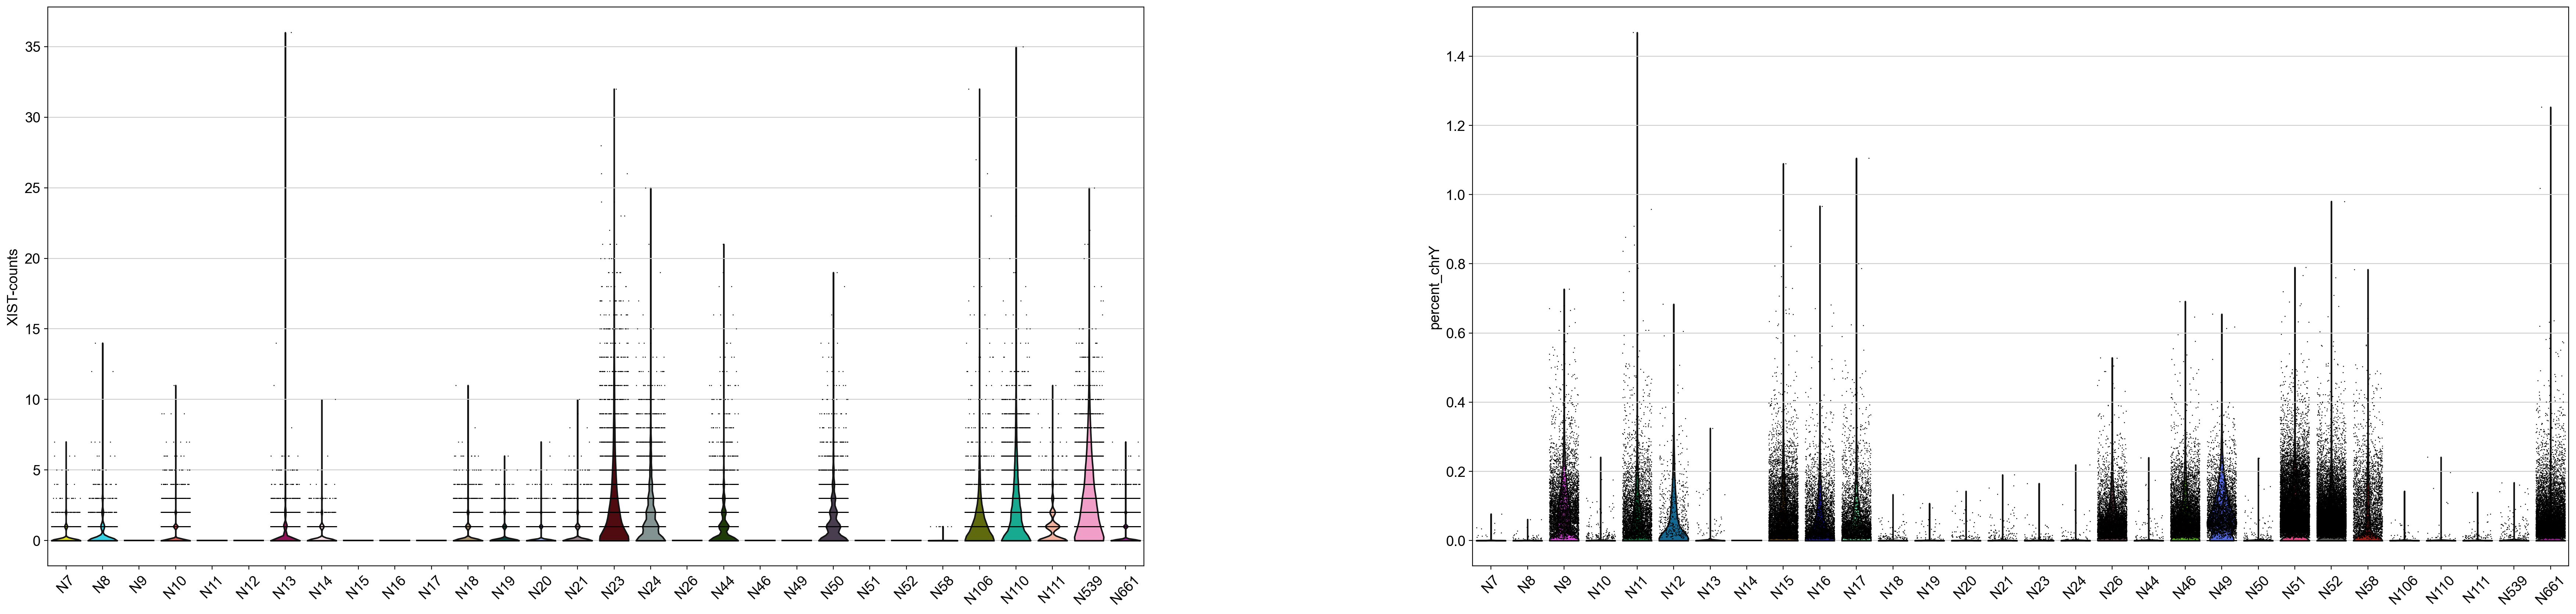

In [48]:
sc.set_figure_params(figsize=(15, 10),dpi=100)
sc.pl.violin(Smillie, ["XIST-counts", "percent_chrY"], jitter = 0.4, groupby = 'Donor_ID', rotation = 45)

In [51]:
# Add 'Female' to sex column in adata.obs
female_donors = ['N7', 'N8', 'N10', 'N13', 'N14', 'N18', 'N19', 'N20', 'N21', 'N23', 'N24', 'N44', 'N50', 'N106', 'N110', 'N111', 'N539']

Smillie.obs['Sex'] = ['Female' if donor in female_donors else 'Male' for donor in Smillie.obs['Donor_ID']]

In [52]:
Smillie.obs['Sex'].value_counts()

Male      134218
Female    106155
Name: Sex, dtype: int64